In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set()
data = pd.read_excel('P1-StartupExpansion.xlsx')

In [4]:
data.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
Store ID           150 non-null int64
City               150 non-null object
State              150 non-null object
Sales Region       150 non-null object
New Expansion      150 non-null object
Marketing Spend    150 non-null int64
Revenue            150 non-null int64
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [6]:
data.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')

In [7]:
data.groupby('State').describe()['Revenue']['mean'].round(0)

State
Alabama           55256.0
Arizona           43737.0
Arkansas          68828.0
California        37609.0
Colorado          31299.0
Connecticut       39628.0
Florida           39919.0
Georgia           39414.0
Illinois          40083.0
Indiana           21953.0
Iowa              44423.0
Kansas            47423.0
Louisiana         48198.0
Massachusetts     33321.0
Michigan          49253.0
Minnesota         18099.0
Mississippi       54701.0
Montana           20541.0
New Hampshire     17006.0
New Jersey        30601.0
New Mexico        19888.0
New York          53349.0
North Carolina    35490.0
Ohio              46195.0
Oklahoma          19120.0
Oregon            19090.0
Rhode Island      62337.0
South Carolina    32129.0
South Dakota      50583.0
Tennessee         50802.0
Texas             37681.0
Utah              42529.0
Virginia          48204.0
Washington        42573.0
Wisconsin         18454.0
Name: mean, dtype: float64

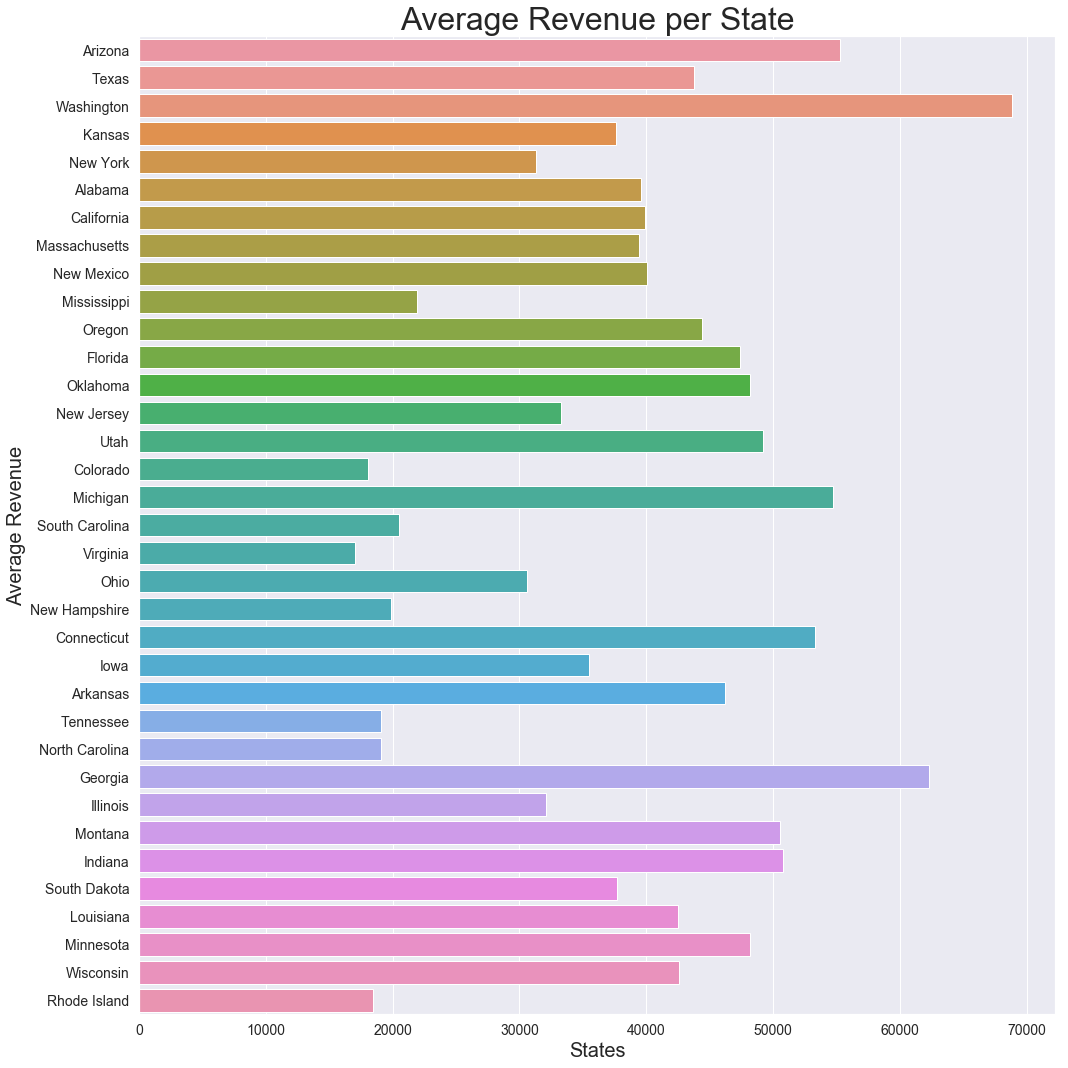

In [8]:
# plt.rcParams['font.size'] = 9.0
fig = plt.figure(figsize=(15,15))
sns.barplot(y=data['State'].unique(),x=data.groupby('State').describe()['Revenue']['mean'].round(0),data=data)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('States',fontSize=20)
plt.ylabel('Average Revenue',fontSize=20)
plt.title('Average Revenue per State',fontSize=32)
plt.tight_layout()
plt.savefig('Average Revenue.png')

In [9]:
data.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


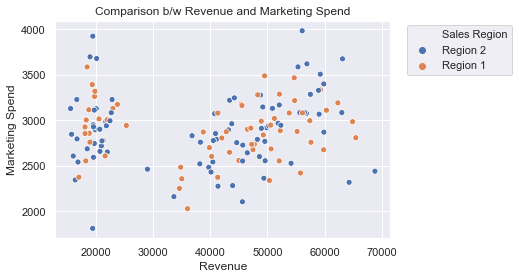

In [10]:
sns.scatterplot(x='Revenue',y='Marketing Spend',data=data,hue='Sales Region')
plt.title('Comparison b/w Revenue and Marketing Spend')
plt.legend(loc=(1.05,0.75))
plt.savefig('Revenue-Spend.png')

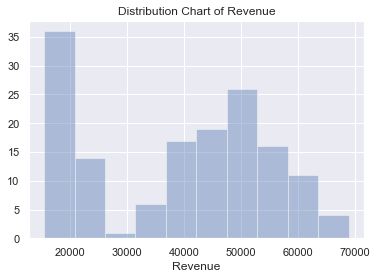

In [12]:
sns.distplot(data['Revenue'],kde=False,bins=10)
plt.title('Distribution Chart of Revenue')
plt.savefig('Revenue Distribution.png')

In [95]:
data.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


In [105]:
data.corr()[1:][['Marketing Spend','Revenue']]

,Marketing Spend,Revenue
Marketing Spend,1.000000,0.094303
Revenue,0.094303,1.000000


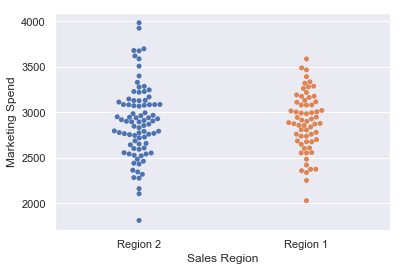

In [13]:
sns.swarmplot(x='Sales Region',y='Marketing Spend',data=data)
plt.savefig('Sales Region Comparison.png')

In [144]:
#City with Highest Revenue
data[data['Revenue']==data['Revenue'].max()][['City','State','Marketing Spend','Revenue']]

63    68828
Name: Revenue, dtype: int64

In [141]:
#City with Lowest Revenue
data[data['Revenue']==data['Revenue'].min()][['City','State','Marketing Spend','Revenue']]

,City,State,Marketing Spend,Revenue
53,Everett,Washington,3129,15562


In [142]:
#City with Highest Marketing Spend
data[data['Marketing Spend']==data['Marketing Spend'].max()][['City','State','Marketing Spend','Revenue']]

,City,State,Marketing Spend,Revenue
86,Amarillo,Texas,3984,56089


In [143]:
#City with Lowest Marketing Spend
data[data['Marketing Spend']==data['Marketing Spend'].min()][['City','State','Marketing Spend','Revenue']]

,City,State,Marketing Spend,Revenue
135,San Mateo,California,1811,19426


In [15]:
#Cities with low marketing spend than average and high revenue than average
major_data = data[(data['Marketing Spend']<data['Marketing Spend'].mean()) & (data['Revenue']>data['Revenue'].mean())]

In [16]:
bar_data = major_data.groupby('State',as_index=False).count().sort_values(by='Revenue',ascending=False).reset_index()[['State','City']]

# By this data we can say that California is most suitable city for most successfull startups with low spend,followed by Washington

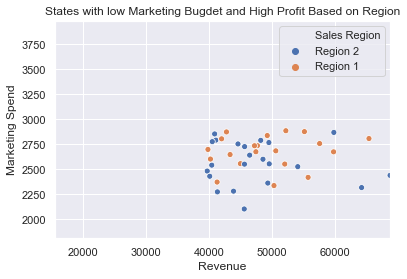

In [18]:
sns.scatterplot(x='Revenue',y='Marketing Spend',data=major_data,hue='Sales Region')
plt.xlim(data['Revenue'].min(),data['Revenue'].max())
plt.ylim(data['Marketing Spend'].min(),data['Marketing Spend'].max())
plt.title('States with low Marketing Bugdet and High Profit Based on Region')
plt.savefig('ProfitableStatesRev.png')

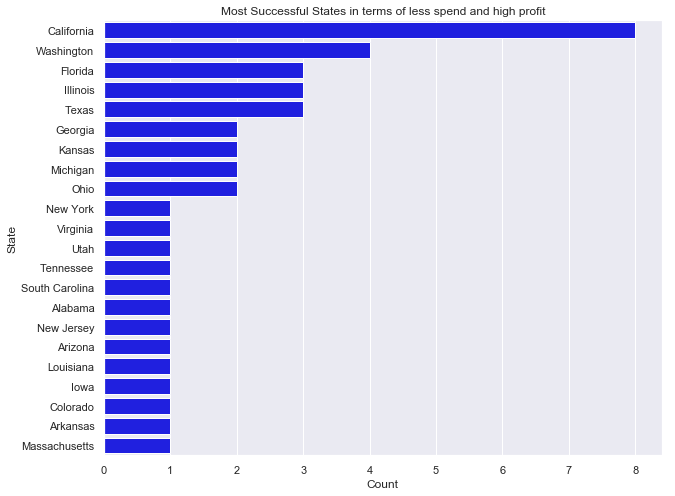

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='City',y='State',data=bar_data,color='blue')
plt.title('Most Successful States in terms of less spend and high profit')
plt.xlabel('Count')
plt.savefig('ProfitableStates.png')